Q-1. Imagine you have a dataset where you have different Instagram features
like surname , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

%matplotlib inline

In [2]:
df = pd.read_csv("instagram_reach.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2 hours,23
2,2,3,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3 hours,49
4,4,5,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",304,#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3 hours,30


In [5]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212. This beautiful new construction our team completed in early May 2018 was sold before the framing was even started!! I am kidding, but it sure felt that way!",614,#beverlyhills #realestate#losangelesrealestate #gc&management #standardoil #standardoilrealty#luxuryrealestate #luxurydesign#losangeles #designer #development#homes #interiordesign #hustle#luxurylifestyle,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow @dvlp_search New workspace 🖥💻⌨️!,450,#workspace #work #developer#development #developerlife #apple #imac#macbook #macbookpro #blackandwhite#coder #code #coding #html #css #php#wordpress #javascript #dvlp_search #linux#ubuntu #webdeveloper #webdev#webdevelopment #dev #coder #coding#code,3 hours,42
97,10,22,ecom.space,"We are coming up with the Best 21 Books that will change your mind about Life, Money and Your self Campaign this week!!We will post this books with genuine reviews from Amazon.com ! Hope you will enjoy this and try to read this amazing books!! Stay Tuned !! 😉❤️",182,#books #book #motivation #inspiration #life#booklover #lifebook2018 #love #finance#personality #training #growth#development #musthave #instadaily#trending #sales #happy #knowledge#knowledgeispower #amazon #fiction #scifi#hotsale #art #biography #autobiography#selfhelp #offers,3 hours,10
98,11,24,lb3enterprises,"We’re only paid to move dirt once. It’s not just about excavating but placing it too. If fills aren’t properly planned for and executed, it can lead to moving material a second time which you don’t get paid for. That’s where good managers and operators who envision the final product are key. We’re hiring operators and grade checkers - send us an email at jobs@lb3enterprises.com to apply!",2039,#heavyequipment #underconstruction#dozer #realestate #bluecollar #D10#ibuildamerica #earthmover #caterpillar#demolition #mining #dumptruck #builtforit#truck #trucks #underconstruction#engineering #ironworker #construction#developer #dirt #constructionworker#safety #madeinamerica #excavator#civilengineering #quarry #Americanmade#development #operator,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarrollo #webdesign#diseñoweb #frontend #backend #apps#app #mobileapps #aplicaciones #españa#panama #argentina #chile #uruguay#digitalmarketing #socialmedia#ecommerce #tiendaonline #design#startup #emprender #website #paginaweb#followme #work #business #empresa,3 hours,109


In [6]:
df.drop(labels=['Unnamed: 0', 'S.No'],axis=1,inplace=True)

In [7]:
df.shape

(100, 6)

In [8]:
df.nunique()

USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [10]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [11]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [12]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [13]:
for i in range(df.shape[0]):
    print(df.iloc[i])
    print("")

USERNAME                                                                                                                                                     mikequindazzi
Caption              Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s
Followers                                                                                                                                                             1600
Hashtags                                                                                                         #MachineLearning #AI #DataAnalytics #DataScienc #DataLake
Time since posted                                                                                                                                                 11 hours
Likes                                                                                                                                            

In [14]:
for i in df.columns:
    print(df[i].unique())

['mikequindazzi' 'drgorillapaints' 'aitrading_official'
 'opensourcedworkplace' 'crea.vision' 'be.masterly' 'lenovoworkstations'
 'kirellb' 'ethicsandai' 'diworksolucionesdeti' 'databowl' 'edwisor_india'
 'ubiqum' 'artificialintelligence.a.i' 'ansonmccade' 'jennifercodes'
 'eligible.api' 'ale_borba' 'amjstaffing' 'writtorg' 'superdatascience'
 'xotivtechnologies' 'onthetopsearch' 'data_enthusiast' 'programmer.io'
 'coding.is.life' 'theminest_' 'philosophercoin' 'greenhousegroup'
 'neondistrictrpg' 'blocsidesports' 'cryptocrackhead' 'gsmusicgroupllc'
 'iotatokennews' 'bitpainting' '_linda_smith567' 'litebit.eu'
 'meganbloemsma' 'ricmiqads' 'hollympeck' 'artificial_quotes' 'interwall'
 'entrancegmbh' 'usccareercenter' '_ehab.othman_' 'anki7singh'
 'mbnsolutions' 'triatebr' 'orcan_intel' 'funnelaico' 'iamalexleyva'
 'astrokpj' 'big.data.hush' 'iamjunkbot' 'ivarski' 'roland.busch'
 'oboteo.ai' 'cris.nemeth' 'interplayofficial' 'alpha_mentor_' 'magnodc'
 'thebeautymindset' 'remi_ole' 'shine

In [15]:
num_cols = df.select_dtypes(exclude='object')
cat_cols = df.select_dtypes(include='object')

In [16]:
num_cols.head()

,Followers,Likes
0,1600,139
1,880,23
2,255,25
3,340,49
4,304,30


In [17]:
cat_cols.head()

,USERNAME,Caption,Hashtags,Time since posted
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11 hours
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2 hours
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2 hours
3,opensourcedworkplace,sfad,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3 hours
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3 hours


In [18]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [19]:
for i in df['USERNAME']:
    print(i)

mikequindazzi
drgorillapaints
aitrading_official
opensourcedworkplace
crea.vision
be.masterly
lenovoworkstations
kirellb
ethicsandai
diworksolucionesdeti
databowl
edwisor_india
ubiqum
artificialintelligence.a.i
ansonmccade
jennifercodes
eligible.api
ale_borba
amjstaffing
writtorg
superdatascience
xotivtechnologies
onthetopsearch
mikequindazzi
data_enthusiast
programmer.io
coding.is.life
theminest_
philosophercoin
philosophercoin
greenhousegroup
neondistrictrpg
blocsidesports
cryptocrackhead
gsmusicgroupllc
iotatokennews
bitpainting
_linda_smith567
litebit.eu
mikequindazzi
meganbloemsma
ricmiqads
hollympeck
artificial_quotes
interwall
entrancegmbh
usccareercenter
_ehab.othman_
anki7singh
mbnsolutions
triatebr
orcan_intel
opensourcedworkplace
funnelaico
iamalexleyva
astrokpj
big.data.hush
iamjunkbot
ivarski
mikequindazzi
roland.busch
oboteo.ai
cris.nemeth
interplayofficial
alpha_mentor_
magnodc
thebeautymindset
remi_ole
shine_my_idol
greg_turner44
siansocial
meaningful_quotee
kamalalsheh

In [20]:
df["len_username"] = ""
for i in range(df.shape[0]):
    df["len_username"].iloc[i] = len(df['USERNAME'].iloc[i])

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\1852465438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_username"].iloc[i] = len(df['USERNAME'].iloc[i])


In [21]:
for i in df['Caption']:
    print(type(i),i)
    print("")

<class 'str'> Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s

<class 'str'> We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing

<class 'str'> Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #a

In [22]:
df["len_caption"] = ""
for i in range(df.shape[0]):
    try:
        df["len_caption"].iloc[i] = len(df['Caption'].iloc[i])
    except:
        df["len_caption"].iloc[i] = 0

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\949249417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_caption"].iloc[i] = len(df['Caption'].iloc[i])
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\949249417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_caption"].iloc[i] = 0


In [23]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,len_username,len_caption
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11 hours,139,13,149
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2 hours,23,15,454
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2 hours,25,18,704
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3 hours,49,20,4
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",304,#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3 hours,30,11,322


In [24]:
for i in df["Hashtags"]:
    print(i)
    print("")

#MachineLearning #AI #DataAnalytics #DataScienc #DataLake

 #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing

#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml

#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #d

In [25]:
df["Hashtagslst"] = ""
for i in range(df.shape[0]):
    df["Hashtagslst"].iloc[i] = df["Hashtags"].iloc[i].split("#")

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\2432398546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hashtagslst"].iloc[i] = df["Hashtags"].iloc[i].split("#")


In [26]:
df.head(3)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,len_username,len_caption,Hashtagslst
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11 hours,139,13,149,"[, MachineLearning , AI , DataAnalytics , DataScienc , DataLake]"
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2 hours,23,15,454,"[ , deck ., mac , macintosh, sayhello , apple , stevejobs , ai , evolution, artificialintelligence , machinelearning, terminator , illbeback , technology, computerevolution , computerscience, sciencefiction, computersciencetosciencefiction, tomorrowstechnology , vr , ar , robot, robots , t2 , businessdeck , businessslides, illustration , sketches , drawing]"
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2 hours,25,18,704,"[, whoiswho , aitrading , ai , aitradingteam, instateam , instapeople , ai , trading, artificialintelligence , crypto, cryptocurrency , blockchain , tradingforex, forex , fiatmoney , coins , machinelearning, userexperience , instamachinelearning, instabigdata , instamarketing, artificialintelligence , deeplearning, datascience , industry , marketing, bigdata , datascience , machinelearning, ml]"


In [27]:
df["NumberOfHastag"] = ""
for i in range(df.shape[0]):
    df["NumberOfHastag"].iloc[i] = len(df["Hashtagslst"].iloc[i])-1

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\4067970203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NumberOfHastag"].iloc[i] = len(df["Hashtagslst"].iloc[i])-1


In [28]:
df.drop(labels= "Hashtagslst" , axis=1,inplace = True)

In [29]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,len_username,len_caption,NumberOfHastag
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11 hours,139,13,149,5
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2 hours,23,15,454,28
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2 hours,25,18,704,30
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3 hours,49,20,4,30
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",304,#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3 hours,30,11,322,26


In [30]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes', 'len_username', 'len_caption', 'NumberOfHastag'],
      dtype='object')

In [31]:
for i in df['Time since posted']:
    print(i)

11 hours
2 hours
2 hours
3 hours
3 hours
3 hours
3 hours
4 hours
4 hours
7 hours
7 hours
8 hours
9 hours
11 hours
3 hours
3 hours
4 hours
4 hours
4 hours
4 hours
5 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
20 hours
4 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
14 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
3 hours
3 hours
4 hours
4 hours
4 hours
4 hours
4 hours
7 hours
24 hours
2 hours
2 hours
2 hours
2 hours
2 hours
3 hours
2 hours
3 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
3 hours
3 hours
3 hours
4 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
2 hours
3 hours
3 hours
3 hours
3 hours
3 hours
3 hours


In [32]:
for i in range(df.shape[0]):
    df['Time since posted'].iloc[i] = df['Time since posted'].iloc[i].replace("hours","")

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\2717492911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time since posted'].iloc[i] = df['Time since posted'].iloc[i].replace("hours","")


In [33]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,len_username,len_caption,NumberOfHastag
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11,139,13,149,5
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2,23,15,454,28
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2,25,18,704,30
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3,49,20,4,30
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",304,#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3,30,11,322,26


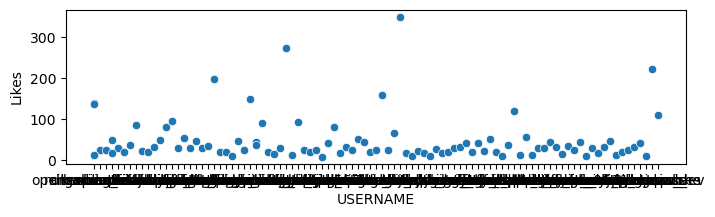

C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\py

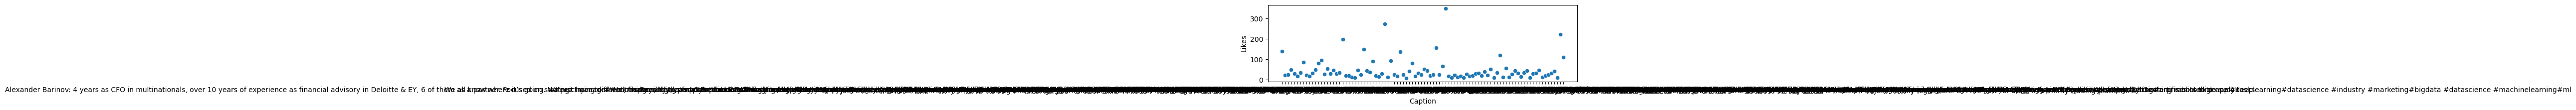

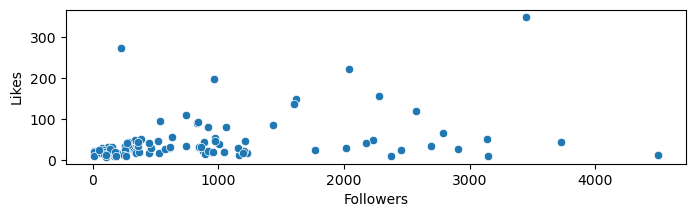

C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


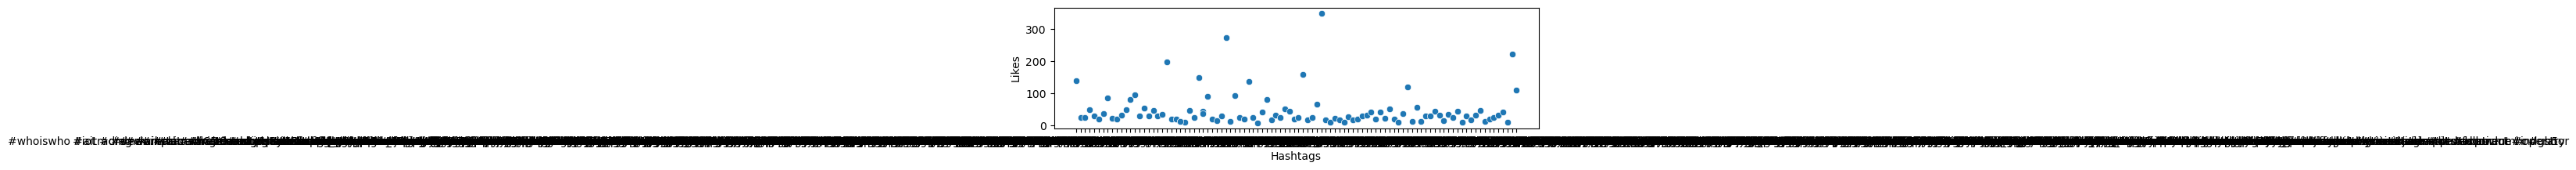

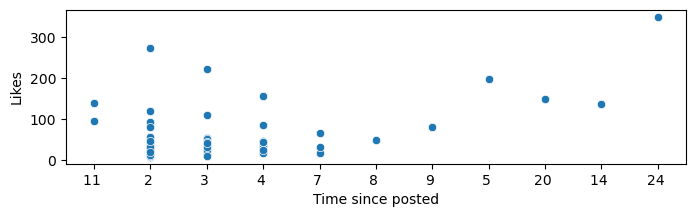

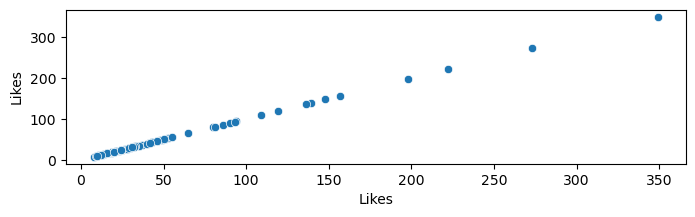

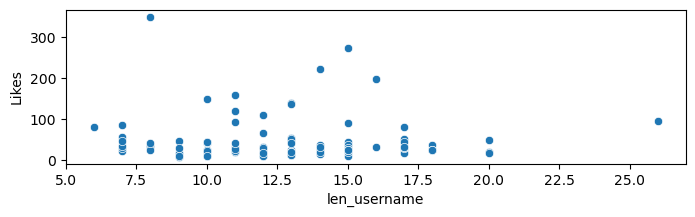

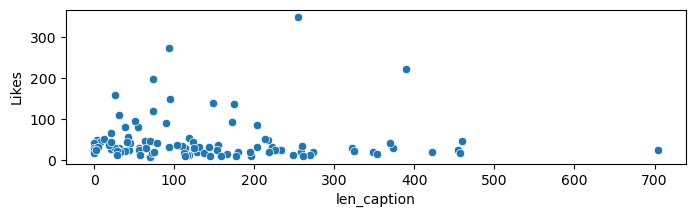

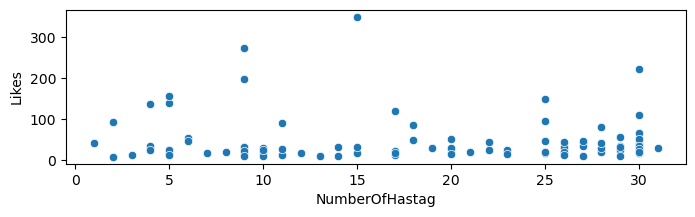

In [34]:
for i in df.columns:
    try:
        plt.figure(figsize = (8, 2))
        sns.scatterplot(x = df[i],y = df['Likes'])
        plt.xlabel(i)
        plt.ylabel('Likes')
        plt.show()
    
    except:
        pass

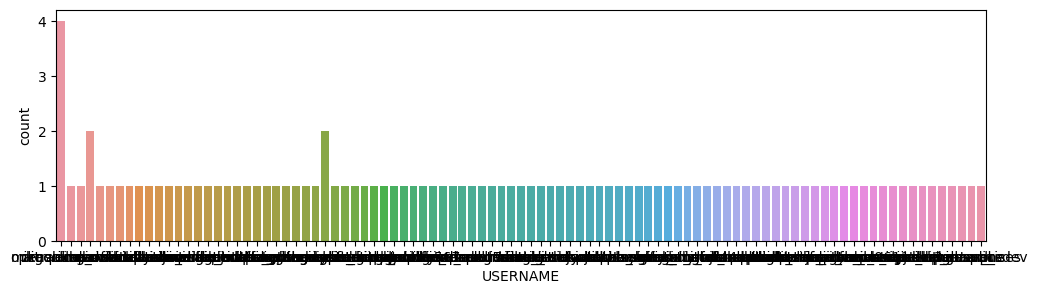

C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\py

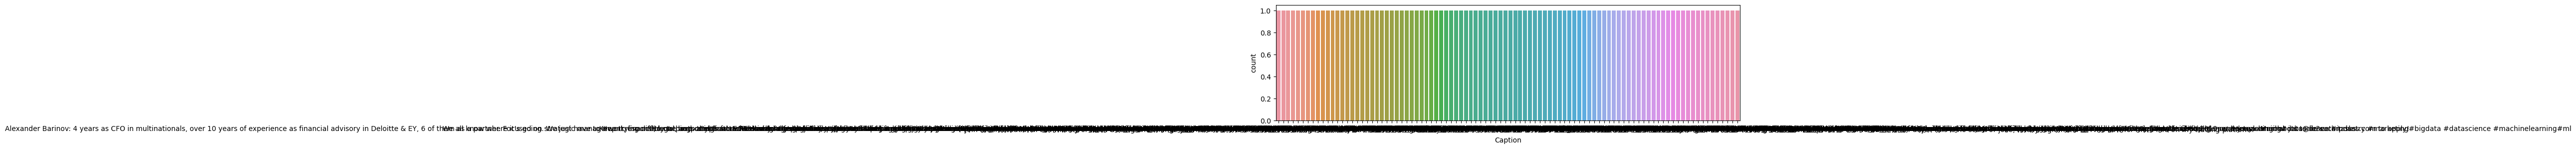

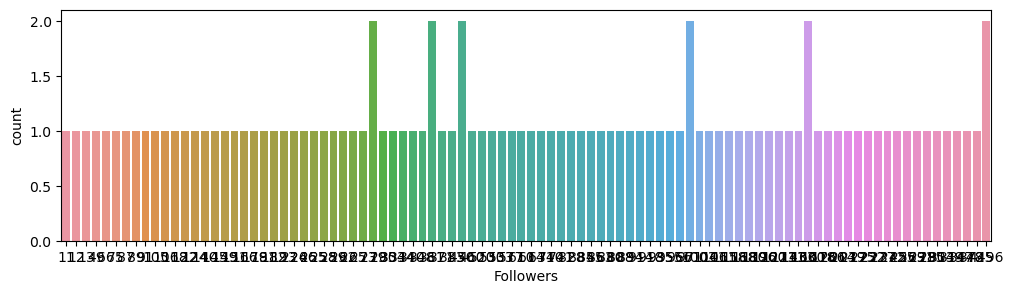

C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


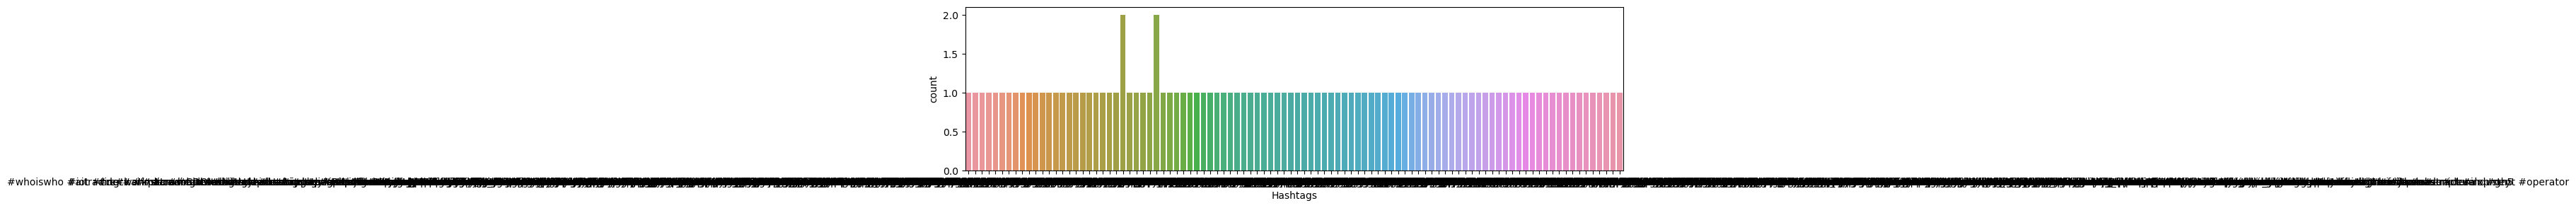

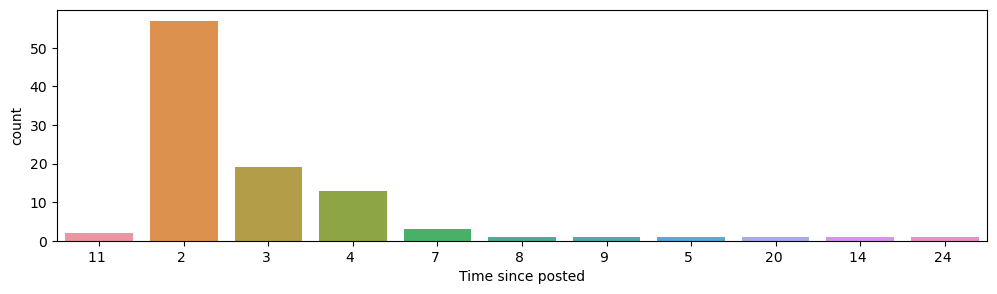

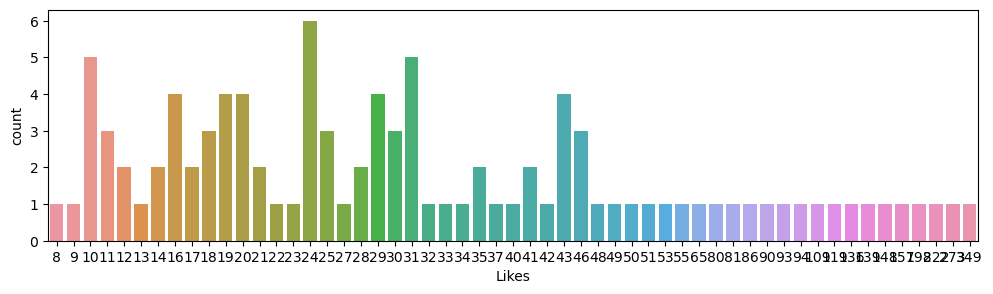

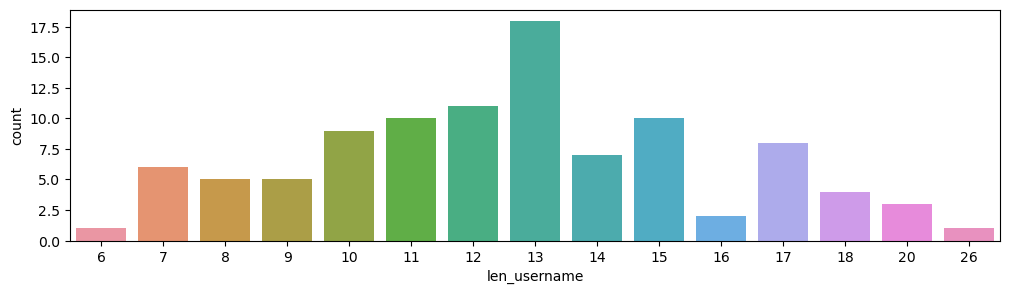

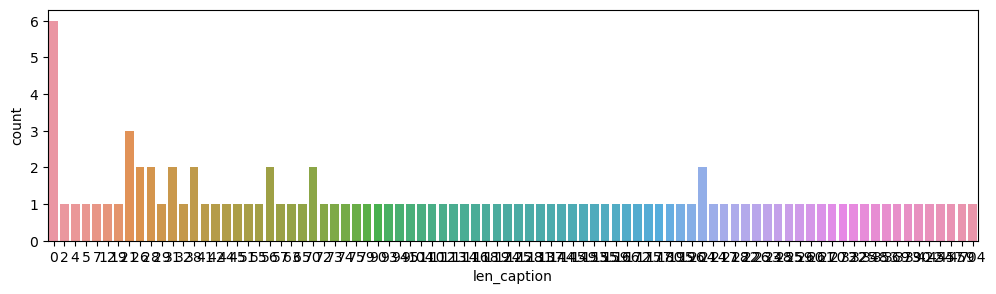

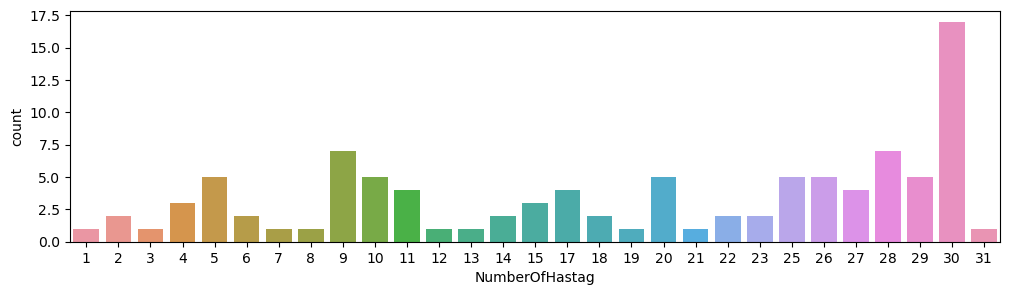

In [35]:
for i in df.columns:
    try:
        plt.figure(figsize = (12,3))
        sns.countplot(x = df[i])
        plt.xlabel(i)
        plt.show()
    
    except:
        pass

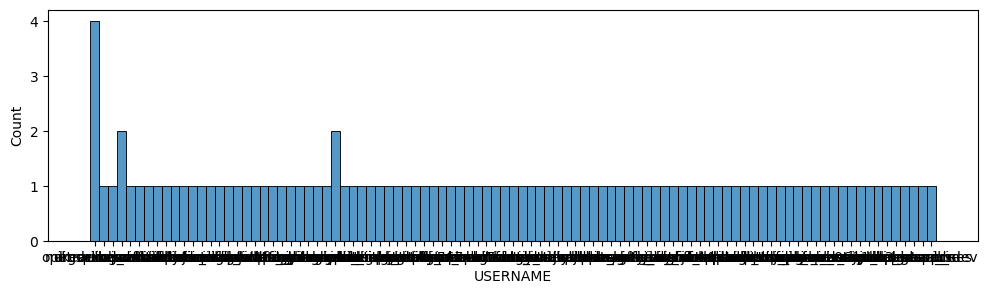

C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\py

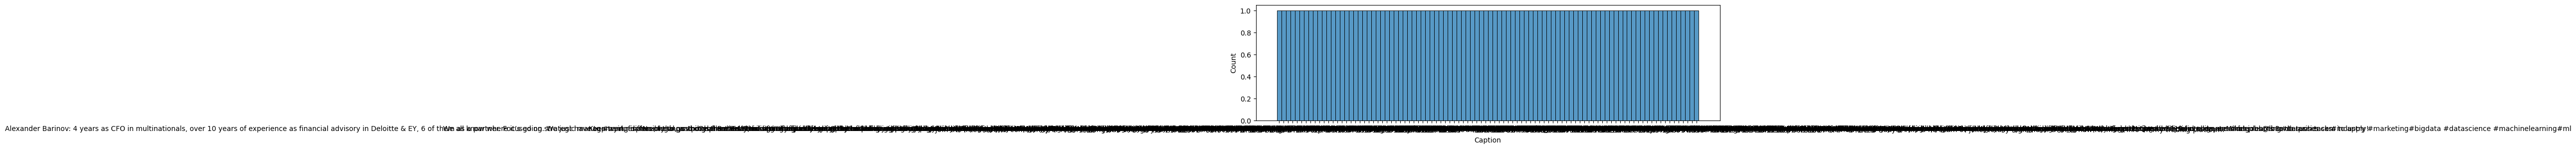

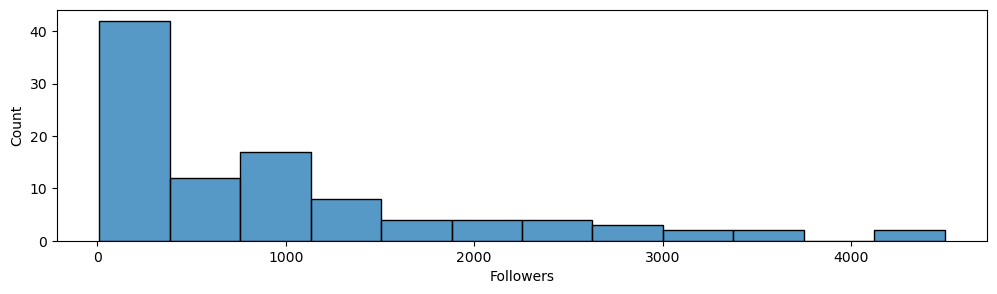

C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RACHIT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


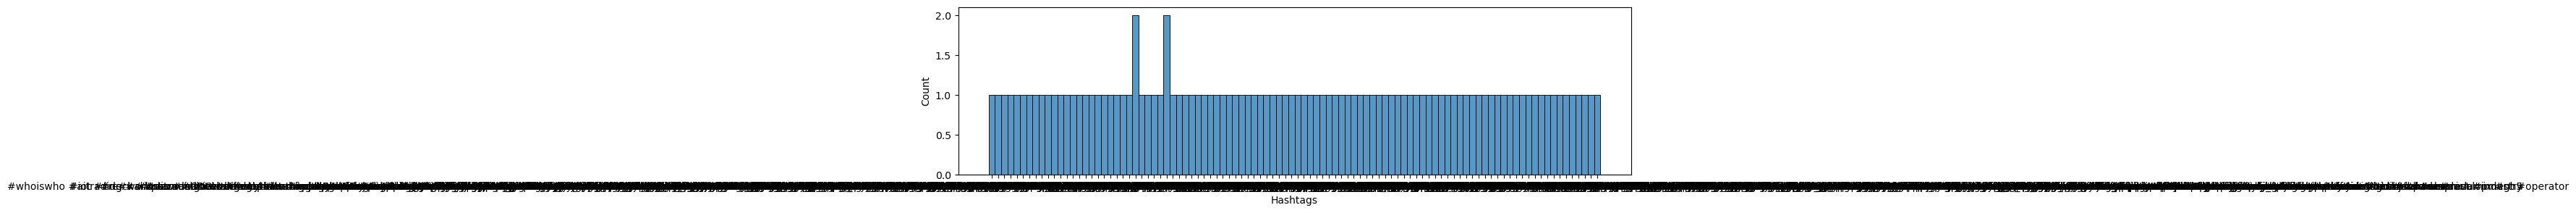

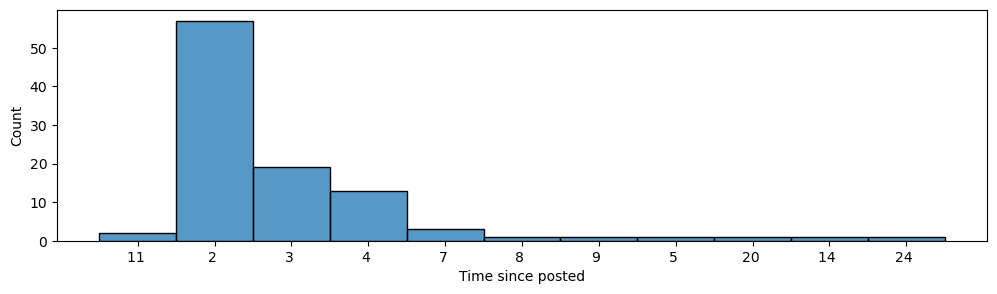

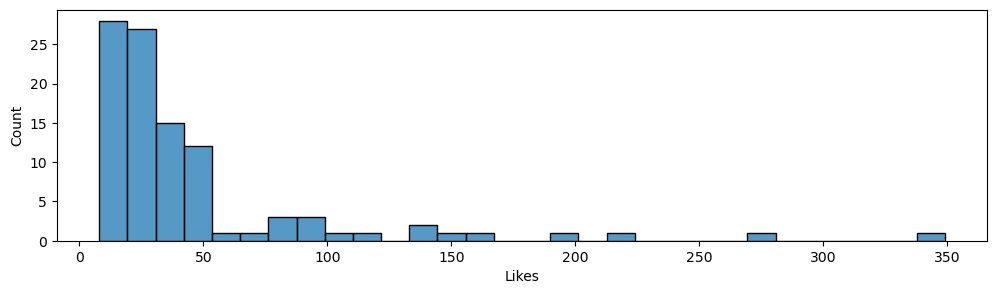

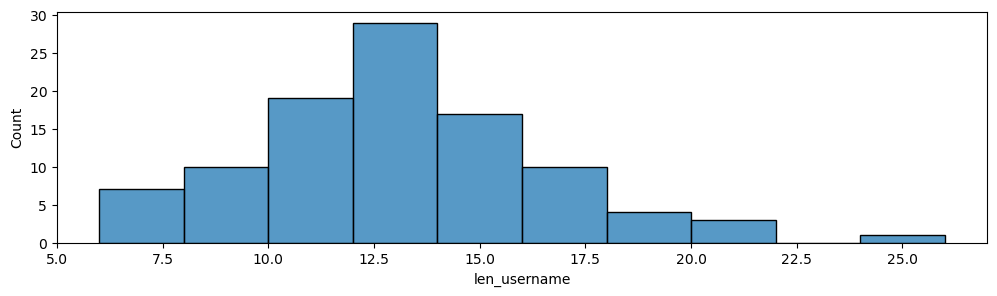

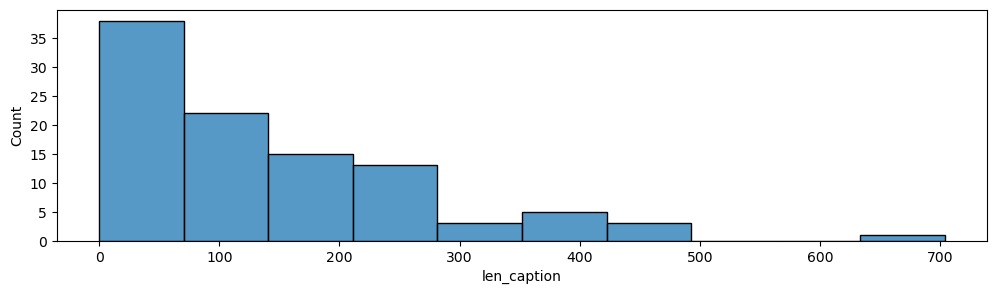

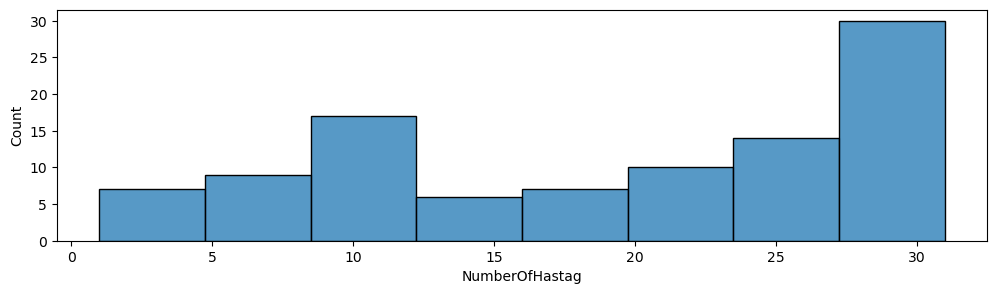

In [36]:
for i in df.columns:
    try:
        plt.figure(figsize = (12,3))
        sns.histplot(x = df[i])
        plt.xlabel(i)
        plt.show()
    except:
        pass

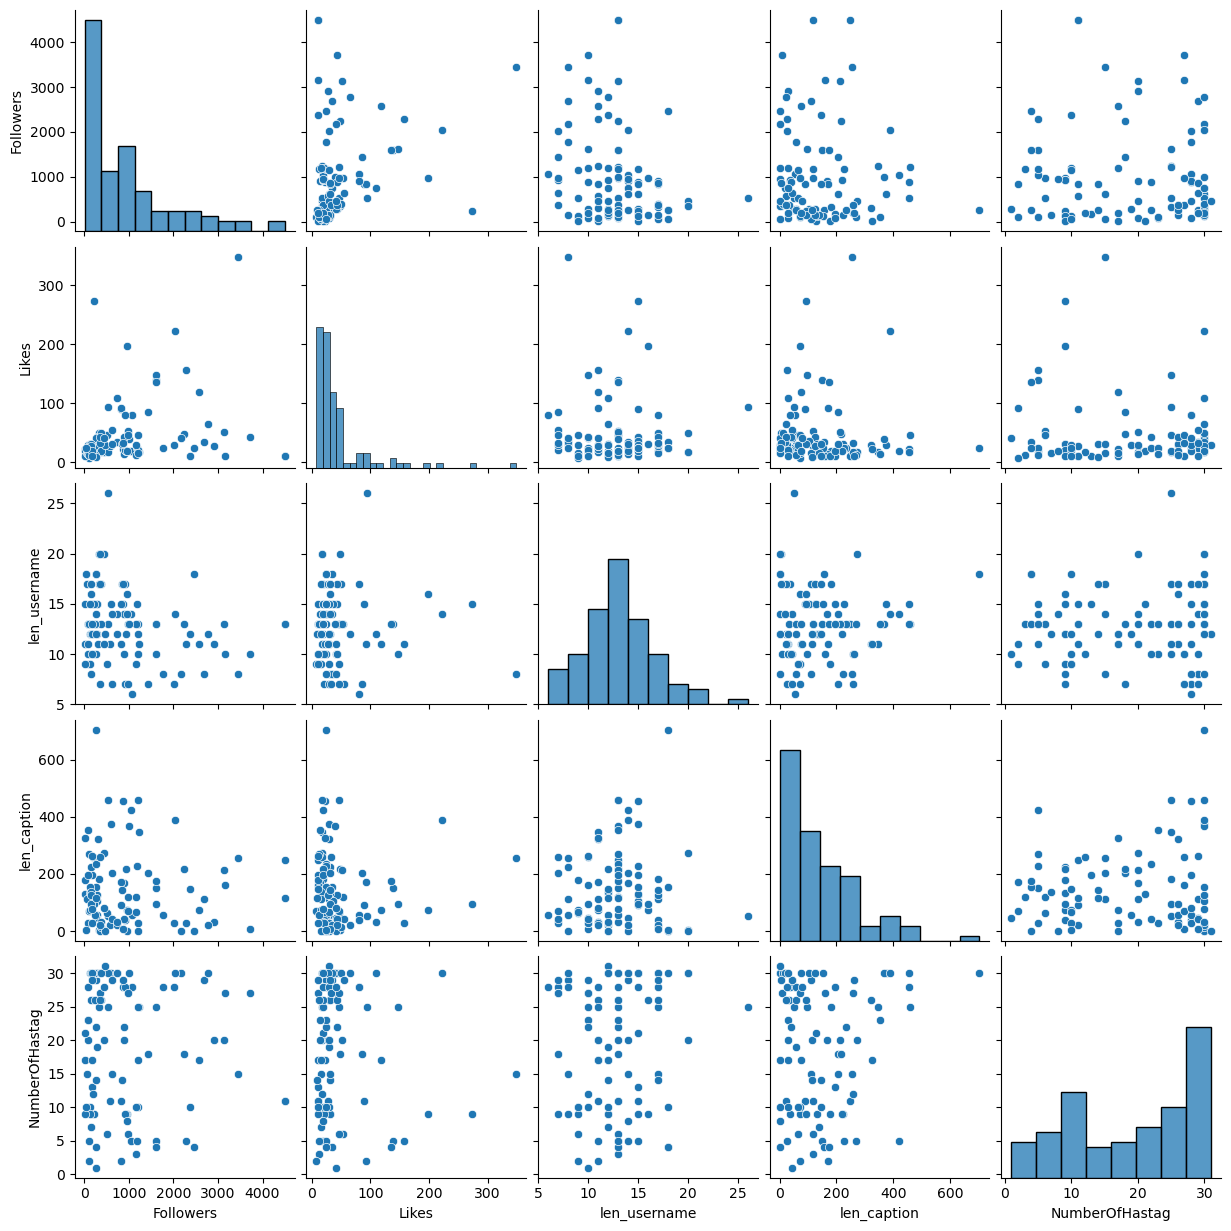

In [37]:
sns.pairplot(df)

In [38]:
createdfeature = ['len_username','len_caption','NumberOfHastag']

In [39]:
df[createdfeature] =  df[createdfeature].astype(float)

In [40]:
num_cols2 = df.select_dtypes(exclude='object')
cat_cols2 = df.select_dtypes(include='object')

In [41]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,len_username,len_caption,NumberOfHastag
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11,139,13.0,149.0,5.0
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2,23,15.0,454.0,28.0
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2,25,18.0,704.0,30.0
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3,49,20.0,4.0,30.0
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",304,#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3,30,11.0,322.0,26.0


In [42]:
num_cols2

,Followers,Likes,len_username,len_caption,NumberOfHastag
0,1600,139,13.0,149.0,5.0
1,880,23,15.0,454.0,28.0
2,255,25,18.0,704.0,30.0
3,340,49,20.0,4.0,30.0
4,304,30,11.0,322.0,26.0
5,1231,18,11.0,348.0,25.0
6,259,35,18.0,155.0,4.0
7,1433,86,7.0,204.0,18.0
8,13,22,11.0,325.0,17.0
9,450,18,20.0,273.0,20.0


In [43]:
cat_cols2

,USERNAME,Caption,Hashtags,Time since posted
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2
3,opensourcedworkplace,sfad,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3
5,be.masterly,"Cyber attacks are more frequent every day and they can affect businesses of all sizes from all around the world. In the #bemasterly course, you’ll learn first-hand how to plan ahead and prevent potential attacks, how to detect an attack and importantly how to respond from a legal, public, internal and technical perspective https://buff.ly/2EeE0JS",#edtech #learning#educationtechnology #tech #learnnewskills #onlinelearning #teach #study #lifelonglearning #bigdata #chatbot #digitalliteracy #entrepreneurship #entrepreneur #startup #startupaus #studying #entrepreneur #machinelearning #coach #tech#techstartup #blockchain #videocourse #analytics,3
6,lenovoworkstations,Check it out – we’re walking across the 🌎’s first #3DPrintedbridge w/ smart sensors for real-time 

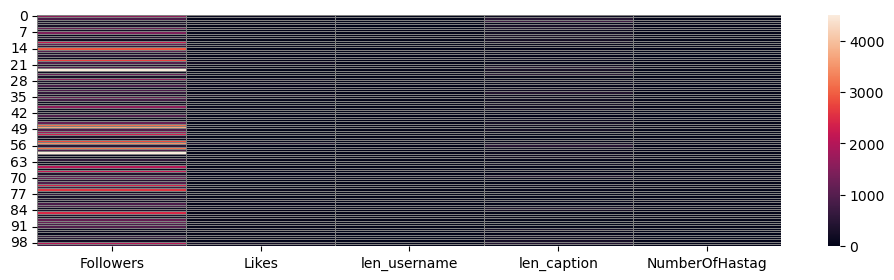

In [44]:
plt.figure(figsize = (12,3))
sns.heatmap(num_cols2,linewidths=0.5, linecolor='gray', cbar=True)
plt.show()

In [45]:
df.corr()

C:\Users\RACHIT\AppData\Local\Temp\ipykernel_28512\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Followers,Likes,len_username,len_caption,NumberOfHastag
Followers,1.000000,0.266218,-0.226806,-0.047477,-0.051553
Likes,0.266218,1.000000,-0.029556,-0.012763,-0.083375
len_username,-0.226806,-0.029556,1.000000,0.066173,0.089279
len_caption,-0.047477,-0.012763,0.066173,1.000000,0.058715
NumberOfHastag,-0.051553,-0.083375,0.089279,0.058715,1.000000


In [46]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes', 'len_username', 'len_caption', 'NumberOfHastag'],
      dtype='object')

In [47]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,len_username,len_caption,NumberOfHastag
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,1600,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake,11,139,13.0,149.0,5.0
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,880,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,2,23,15.0,454.0,28.0
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",255,#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,2,25,18.0,704.0,30.0
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot,3,49,20.0,4.0,30.0
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",304,#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy,3,30,11.0,322.0,26.0


In [48]:
df['Followers'].dtype

dtype('int64')

In [49]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes', 'len_username', 'len_caption', 'NumberOfHastag'],
      dtype='object')

In [50]:
features = df[['USERNAME','Followers','len_username', 'len_caption', 'NumberOfHastag','Caption','Hashtags']]
target_likes = df['Likes']
target_time_since_posted = df['Time since posted']

In [51]:
num_cols = features.select_dtypes(exclude='object')
cat_cols = features.select_dtypes(include='object')

In [52]:
num_cols.head()

,Followers,len_username,len_caption,NumberOfHastag
0,1600,13.0,149.0,5.0
1,880,15.0,454.0,28.0
2,255,18.0,704.0,30.0
3,340,20.0,4.0,30.0
4,304,11.0,322.0,26.0


In [53]:
cat_cols.head()

,USERNAME,Caption,Hashtags
0,mikequindazzi,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake
1,drgorillapaints,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing
2,aitrading_official,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml
3,opensourcedworkplace,sfad,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot
4,crea.vision,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy


In [54]:
features.head()

,USERNAME,Followers,len_username,len_caption,NumberOfHastag,Caption,Hashtags
0,mikequindazzi,1600,13.0,149.0,5.0,Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s,#MachineLearning #AI #DataAnalytics #DataScienc #DataLake
1,drgorillapaints,880,15.0,454.0,28.0,We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing,#deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing
2,aitrading_official,255,18.0,704.0,30.0,"Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml",#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml
3,opensourcedworkplace,340,20.0,4.0,30.0,sfad,#iot #cre#workplace #CDO #bigdata #technology#tech #work #computerscience #blockchain#softwaredeveloper #machinelearning#smartcity #artificialintelligence#futureofwork #opensource #cybersecurity#ai #softwareengineer #engineering#smartcities #developer #autonomous#singularity #webdeveloper#cryptocurrency #programmers #crypto#iiot #robot
4,crea.vision,304,11.0,322.0,26.0,"Ever missed a call while your phone was charging? Our system can notify you about the incoming call and offer to take it hands free. You’ll be able to walk around the house and carry on your conversation without carrying the phone with you. Listen to music, stream, or watch TV in a seamless flow from one room to another.",#instamachinelearning #instabigdata#instamarketing #artificialintelligence#industry #deeplearning #datascience#marketing #machinelearning #bigdata#artificialintelligence #instadaily #tech#software #softwareengineer #technology#crea.vision #techy #artificial #artificiale#ipictureoftheday #marketingdigital #digital#live #better #enjoy


In [55]:
target_likes.head()

0    139
1     23
2     25
3     49
4     30
Name: Likes, dtype: int64

In [56]:
target_time_since_posted.head()

0    11 
1     2 
2     2 
3     3 
4     3 
Name: Time since posted, dtype: object

In [57]:
cat_cols2["USERNAME"].head()

0           mikequindazzi
1         drgorillapaints
2      aitrading_official
3    opensourcedworkplace
4             crea.vision
Name: USERNAME, dtype: object

In [58]:
num_cols.columns

Index(['Followers', 'len_username', 'len_caption', 'NumberOfHastag'], dtype='object')

In [59]:
cat_cols.columns

Index(['USERNAME', 'Caption', 'Hashtags'], dtype='object')

In [65]:
features.iloc[:, 1:4]

,Followers,len_username,len_caption
0,1600,13.0,149.0
1,880,15.0,454.0
2,255,18.0,704.0
3,340,20.0,4.0
4,304,11.0,322.0
5,1231,11.0,348.0
6,259,18.0,155.0
7,1433,7.0,204.0
8,13,11.0,325.0
9,450,20.0,273.0


In [66]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

std = StandardScaler()
encoder = OneHotEncoder()

categorical_encoded1 = encoder.fit_transform(features[cat_cols.columns]).toarray()
X = std.fit_transform(features.iloc[:, 1:4])

In [67]:
X_preprocessed = np.concatenate((X, categorical_encoded1), axis=1)

In [68]:
X.shape

(100, 3)

In [69]:
categorical_encoded1.shape

(100, 288)

In [70]:
X_preprocessed.shape

(100, 291)

In [71]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
X_preprocessed, target_likes, target_time_since_posted, test_size=0.2, shuffle=True)

In [72]:
X_train.shape

(80, 291)

In [73]:
X_test.shape

(20, 291)

# Creating Model for Likes

In [74]:
y_train = y_likes_train
y_test = y_likes_test

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import  mean_squared_error,r2_score

linear_regressor = LinearRegression()
dt_regressor = DecisionTreeRegressor(max_depth = 10 ,min_samples_leaf = 1,min_samples_split = 2,)
rf_regressor = RandomForestRegressor(max_depth = 5,max_features = 'auto' ,min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
gb_regressor = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,n_estimators = 300,subsample = 1.0)
svr_regressor = SVR(C = 0.1, epsilon = 0.2, kernel = 'linear')
nn_regressor = MLPRegressor(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (100,), learning_rate = 'constant'   )

linear_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)
svr_regressor.fit(X_train, y_train)
nn_regressor.fit(X_train, y_train)

print("Linear Regression train Score:",linear_regressor.score(X_train, y_train))
print("Decision Tree Regression train Score:",dt_regressor.score(X_train, y_train))
print("Random Forest Regression train Score:",rf_regressor.score(X_train, y_train))
print("Gradient Boosting Regression train Score:", gb_regressor.score(X_train, y_train))
print("Support Vector Regression train Score:",svr_regressor.score(X_train, y_train))
print("Neural Network Regression train Score:",nn_regressor.score(X_train, y_train))

print("#"*50)
print("#"*50)
print("#"*50)

pred_linear = linear_regressor.predict(X_test)
pred_dt = dt_regressor.predict(X_test)
pred_rf = rf_regressor.predict(X_test)
pred_gb = gb_regressor.predict(X_test)
pred_svr = svr_regressor.predict(X_test)
pred_nn = nn_regressor.predict(X_test)

linear_mse =  mean_squared_error(y_test,pred_linear )
dt_mse = mean_squared_error(y_test,pred_dt)
rf_mse = mean_squared_error(y_test,pred_rf)
gb_mse = mean_squared_error(y_test, pred_gb)
svr_mse = mean_squared_error(y_test,pred_svr)
nn_mse = mean_squared_error(y_test,pred_nn)

linear_r2 = r2_score(y_test,pred_linear)
dt_r2 = r2_score(y_test, pred_dt)
rf_r2 = r2_score(y_test, pred_rf)
gb_r2 = r2_score(y_test, pred_gb)
svr_r2 = r2_score(y_test,pred_svr)
nn_r2 = r2_score(y_test, pred_nn)

print("Linear Regression mse Score:", linear_mse)
print("Decision Tree Regression mse Score:", dt_mse)
print("Random Forest Regression mse Score:", rf_mse)
print("Gradient Boosting Regression mse Score:", gb_mse)
print("Support Vector Regression mse Score:", svr_mse)
print("Neural Network Regression mse Score:", nn_mse)

print("#"*50)
print("#"*50)
print("#"*50)

print("Linear Regression R2 Score:", linear_r2)
print("Decision Tree Regression R2 Score:", dt_r2)
print("Random Forest Regression R2 Score:", rf_r2)
print("Gradient Boosting Regression R2 Score:", gb_r2)
print("Support Vector Regression R2 Score:", svr_r2)
print("Neural Network Regression R2 Score:", nn_r2)

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Linear Regression train Score: 1.0
Decision Tree Regression train Score: 0.9428229442387519
Random Forest Regression train Score: 0.7774903424345032
Gradient Boosting Regression train Score: 0.9670322294760924
Support Vector Regression train Score: -0.1017767560515761
Neural Network Regression train Score: -0.20033276528009147
##################################################
##################################################
##################################################
Linear Regression mse Score: 1032.009056530038
Decision Tree Regression mse Score: 1063.6328605568392
Random Forest Regression mse Score: 1175.7935531442884
Gradient Boosting Regression mse Score: 758.6585244143132
Support Vector Regression mse Score: 1252.6052794282948
Neural Network Regression mse Score: 2221.170584546631
##################################################
##################################################
##################################################
Linear Regression R2 Score: 0.017739958

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Creating Model for time_since_posted

In [ ]:
y_train =  y_time_train
y_test = y_time_test

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import  mean_squared_error,r2_score

linear_regressor = LinearRegression()
dt_regressor = DecisionTreeRegressor(max_depth = 10 ,min_samples_leaf = 1,min_samples_split = 2,)
rf_regressor = RandomForestRegressor(max_depth = 5,max_features = 'auto' ,min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
gb_regressor = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,n_estimators = 300,subsample = 1.0)
svr_regressor = SVR(C = 0.1, epsilon = 0.2, kernel = 'linear')
nn_regressor = MLPRegressor(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (100,), learning_rate = 'constant'   )

linear_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)
svr_regressor.fit(X_train, y_train)
nn_regressor.fit(X_train, y_train)

print("Linear Regression train Score:",linear_regressor.score(X_train, y_train))
print("Decision Tree Regression train Score:",dt_regressor.score(X_train, y_train))
print("Random Forest Regression train Score:",rf_regressor.score(X_train, y_train))
print("Gradient Boosting Regression train Score:", gb_regressor.score(X_train, y_train))
print("Support Vector Regression train Score:",svr_regressor.score(X_train, y_train))
print("Neural Network Regression train Score:",nn_regressor.score(X_train, y_train))

print("#"*50)
print("#"*50)
print("#"*50)

pred_linear = linear_regressor.predict(X_test)
pred_dt = dt_regressor.predict(X_test)
pred_rf = rf_regressor.predict(X_test)
pred_gb = gb_regressor.predict(X_test)
pred_svr = svr_regressor.predict(X_test)
pred_nn = nn_regressor.predict(X_test)

linear_mse =  mean_squared_error(y_test,pred_linear )
dt_mse = mean_squared_error(y_test,pred_dt)
rf_mse = mean_squared_error(y_test,pred_rf)
gb_mse = mean_squared_error(y_test, pred_gb)
svr_mse = mean_squared_error(y_test,pred_svr)
nn_mse = mean_squared_error(y_test,pred_nn)

linear_r2 = r2_score(y_test,pred_linear)
dt_r2 = r2_score(y_test, pred_dt)
rf_r2 = r2_score(y_test, pred_rf)
gb_r2 = r2_score(y_test, pred_gb)
svr_r2 = r2_score(y_test,pred_svr)
nn_r2 = r2_score(y_test, pred_nn)

print("Linear Regression mse Score:", linear_mse)
print("Decision Tree Regression mse Score:", dt_mse)
print("Random Forest Regression mse Score:", rf_mse)
print("Gradient Boosting Regression mse Score:", gb_mse)
print("Support Vector Regression mse Score:", svr_mse)
print("Neural Network Regression mse Score:", nn_mse)

print("#"*50)
print("#"*50)
print("#"*50)

print("Linear Regression R2 Score:", linear_r2)
print("Decision Tree Regression R2 Score:", dt_r2)
print("Random Forest Regression R2 Score:", rf_r2)
print("Gradient Boosting Regression R2 Score:", gb_r2)
print("Support Vector Regression R2 Score:", svr_r2)
print("Neural Network Regression R2 Score:", nn_r2)

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Linear Regression train Score: 1.0
Decision Tree Regression train Score: 0.9428229442387519
Random Forest Regression train Score: 0.7894358206393188
Gradient Boosting Regression train Score: 0.9670322309993584
Support Vector Regression train Score: -0.1017767560515761
Neural Network Regression train Score: -0.19374301477258227
##################################################
##################################################
##################################################
Linear Regression mse Score: 1032.009056530038
Decision Tree Regression mse Score: 1844.8828605568385
Random Forest Regression mse Score: 1176.192349621448
Gradient Boosting Regression mse Score: 755.6487800613007
Support Vector Regression mse Score: 1252.6052794282948
Neural Network Regression mse Score: 2197.7834733765044
##################################################
##################################################
##################################################
Linear Regression R2 Score: 0.017739958

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
